In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv('bike_data.csv')
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,work_hours
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.isnull().sum()

date                      0
rented_bike_count         0
hour                      0
temperature               0
humidity                  0
wind_speed                0
visibility                0
dew_point_temperature    86
solar_radiation           0
rainfall                  0
snowfall                  0
seasons                   0
holiday                   0
work_hours                0
dtype: int64

In [4]:
df['dew_point_temperature'].fillna(df['dew_point_temperature'].mean(), inplace=True)
df.isnull().sum()

date                     0
rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
work_hours               0
dtype: int64

In [5]:
df['day'] = pd.DatetimeIndex(df['date']).month
df['month'] = pd.DatetimeIndex(df['date']).day
df['year'] = pd.DatetimeIndex(df['date']).year

df.drop('date', axis=1, inplace=True)
df.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,work_hours,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [6]:
df = pd.get_dummies(df)
df.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,...,month,year,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,work_hours_No,work_hours_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,2017,False,False,False,True,False,True,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,2017,False,False,False,True,False,True,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,2017,False,False,False,True,False,True,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,2017,False,False,False,True,False,True,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,2017,False,False,False,True,False,True,False,True


In [7]:
df.describe()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,day,month,year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.102974,0.569111,0.148687,0.075068,6.526027,15.720548,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,12.985616,0.868746,1.128193,0.436746,3.448048,8.796749,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.500000,0.000000,0.000000,0.000000,4.000000,8.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,4.900000,0.010000,0.000000,0.000000,7.000000,16.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.700000,0.930000,0.000000,0.000000,10.000000,23.000000,2018.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,31.000000,2018.000000


(array([ 112.,  417.,  809., 1180., 1234., 1194., 1569., 1354.,  717.,
         174.]),
 array([-17.8 , -12.08,  -6.36,  -0.64,   5.08,  10.8 ,  16.52,  22.24,
         27.96,  33.68,  39.4 ]),
 <BarContainer object of 10 artists>)

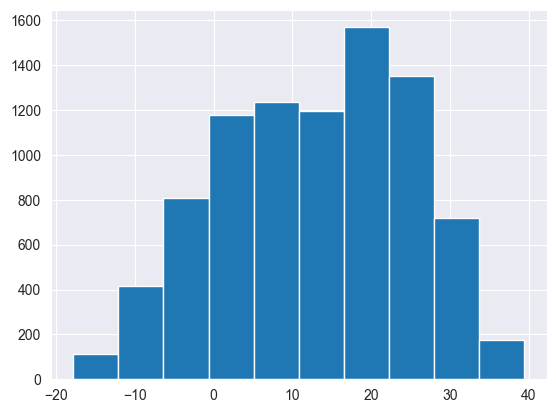

In [8]:
plt.hist(df['temperature'])

<Axes: xlabel='temperature', ylabel='rented_bike_count'>

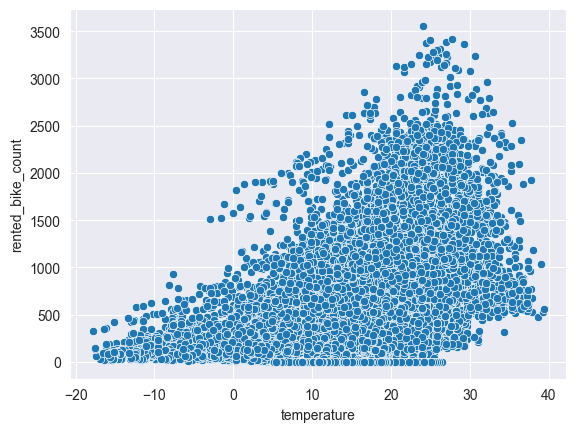

In [9]:
sns.scatterplot(x='temperature', y='rented_bike_count', data=df)

In [10]:
input_data = df.columns.tolist()
output_data = 'rented_bike_count'
input_data.remove(output_data)

x_train, x_test, y_train, y_test = train_test_split(df[input_data], df[output_data], test_size=0.3, random_state=1234)

In [11]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [12]:
print('mean absolute error:', mean_absolute_error(y_test, y_pred))
print('mean squared error', mean_squared_error(y_test, y_pred))
print('explained_variance_score:', explained_variance_score(y_test, y_pred))

mean absolute error: 330.25705775846876
mean squared error 194052.05814467414
explained_variance_score: 0.5525325162901681


In [13]:
r_reg = Ridge(alpha=0.5).fit(x_train, y_train)
r_y_pred = r_reg.predict(x_test)

In [14]:
print('mean absolute error:', mean_absolute_error(y_test, r_y_pred))
print('mean squared error', mean_squared_error(y_test, r_y_pred))
print('explained_variance_score:', explained_variance_score(y_test, r_y_pred))

mean absolute error: 330.2459389010919
mean squared error 194054.69852682788
explained_variance_score: 0.5525258807117424


In [15]:
lin_reg_res = [mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), explained_variance_score(y_test, y_pred)]
ridge_reg_res = [mean_absolute_error(y_test, r_y_pred), mean_squared_error(y_test, r_y_pred), explained_variance_score(y_test, r_y_pred)]
print(lin_reg_res)
print(ridge_reg_res)

[330.25705775846876, 194052.05814467414, 0.5525325162901681]
[330.2459389010919, 194054.69852682788, 0.5525258807117424]


<BarContainer object of 2 artists>

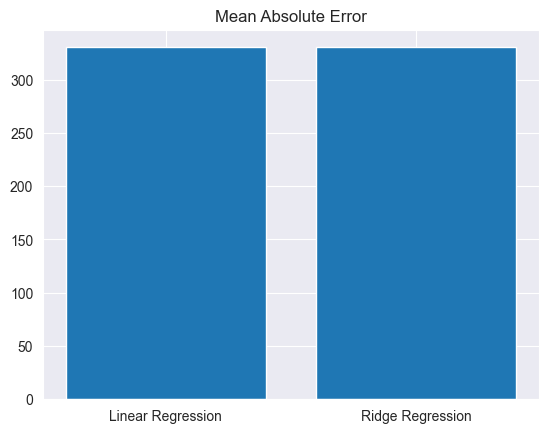

In [16]:
#Mean Absolute Error (MAE) is a metric used to measure the average absolute difference between observed and predicted values
plt.title("Mean Absolute Error")
plt.bar(['Linear Regression', 'Ridge Regression'], [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, r_y_pred)])

<BarContainer object of 2 artists>

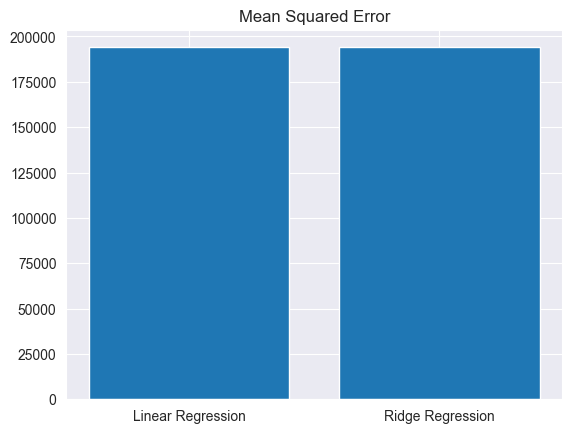

In [17]:
#Mean Square Error (MSE) is a mathematical measure used to assess the average squared difference between observed and predicted values
plt.title("Mean Squared Error")
plt.bar(['Linear Regression', 'Ridge Regression'], [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, r_y_pred)])

<BarContainer object of 2 artists>

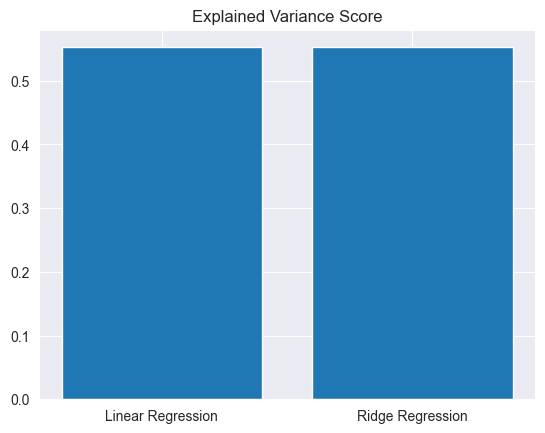

In [18]:
#Explained Variance Score (EVS) is a statistical measure of how close the data are to the fitted regression line
plt.title("Explained Variance Score")
plt.bar(['Linear Regression', 'Ridge Regression'], [explained_variance_score(y_test, y_pred), explained_variance_score(y_test, r_y_pred)])